# Breast Cancer Prediction - Exploratory Data Analysis

**Author:** Aakar Shah
**Date:** February 2026  
**Course:** Module 20 - Capstone EDA

## Research Question
Can machine learning models accurately predict breast cancer malignancy from cellular measurements of fine needle aspirate samples, and which characteristics are most predictive of malignancy?

## Objectives
1. Load and explore the Breast Cancer Wisconsin dataset
2. Perform data cleaning and check data quality
3. Conduct exploratory data analysis with visualizations
4. Build a baseline logistic regression model
5. Evaluate model performance

## 1. Install Required Package

Installing the UCI ML Repository package to load the dataset.

In [44]:
# Install ucimlrepo package
!pip install ucimlrepo

## 2. Import Libraries

Importing all the necessary libraries for data analysis, visualization, and machine learning.

In [45]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset from UCI
from ucimlrepo import fetch_ucirepo

# Settings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Load Data

Loading the Breast Cancer Wisconsin (Diagnostic) dataset directly from the UCI Machine Learning Repository.

In [46]:
# Fetch dataset from UCI repository
breast_cancer = fetch_ucirepo(id=17)

# Get features (X) and target (y)
X = breast_cancer.data.features
y = breast_cancer.data.targets

print("Data loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Data loaded successfully!
Features shape: (569, 30)
Target shape: (569, 1)


## 4. Initial Data Exploration

Taking a first look at the data to understand its structure and content.

In [47]:
# Display first few rows
print("First 5 rows of features:")
print(X.head())
print("\nFirst 5 rows of target:")
print(y.head())

First 5 rows of features:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  

In [48]:
# Basic information about the dataset
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature names:")
print(X.columns.tolist())

Dataset Information:
Number of samples: 569
Number of features: 30

Feature names:
['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [49]:
# Check data types
print("Data types:")
print(X.dtypes)

Data types:
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object


In [50]:
# Check target distribution
print("Target variable distribution:")
print(y['Diagnosis'].value_counts())
print("\nTarget proportions:")
print(y['Diagnosis'].value_counts(normalize=True))

Target variable distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64

Target proportions:
Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


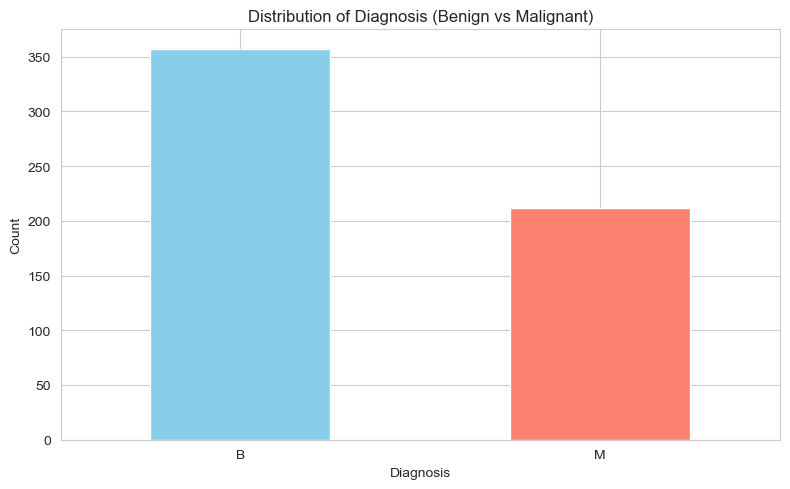

In [51]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
y['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Diagnosis (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Data Cleaning

Checking for missing values, duplicates, and data quality issues.

In [52]:
# Check for missing values
print("Missing values in features:")
print(X.isnull().sum().sum())

print("\nMissing values in target:")
print(y.isnull().sum().sum())

if X.isnull().sum().sum() == 0 and y.isnull().sum().sum() == 0:
    print("\n✓ No missing values found in the dataset!")

Missing values in features:
0

Missing values in target:
0

✓ No missing values found in the dataset!


In [53]:
# Check for duplicate rows
duplicates = X.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✓ No duplicate rows found!")

Number of duplicate rows: 0
✓ No duplicate rows found!


In [54]:
# Basic statistics
print("Summary statistics of features:")
X.describe()

Summary statistics of features:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 6. Exploratory Data Analysis (EDA)

Visualizing the data to understand patterns and relationships.

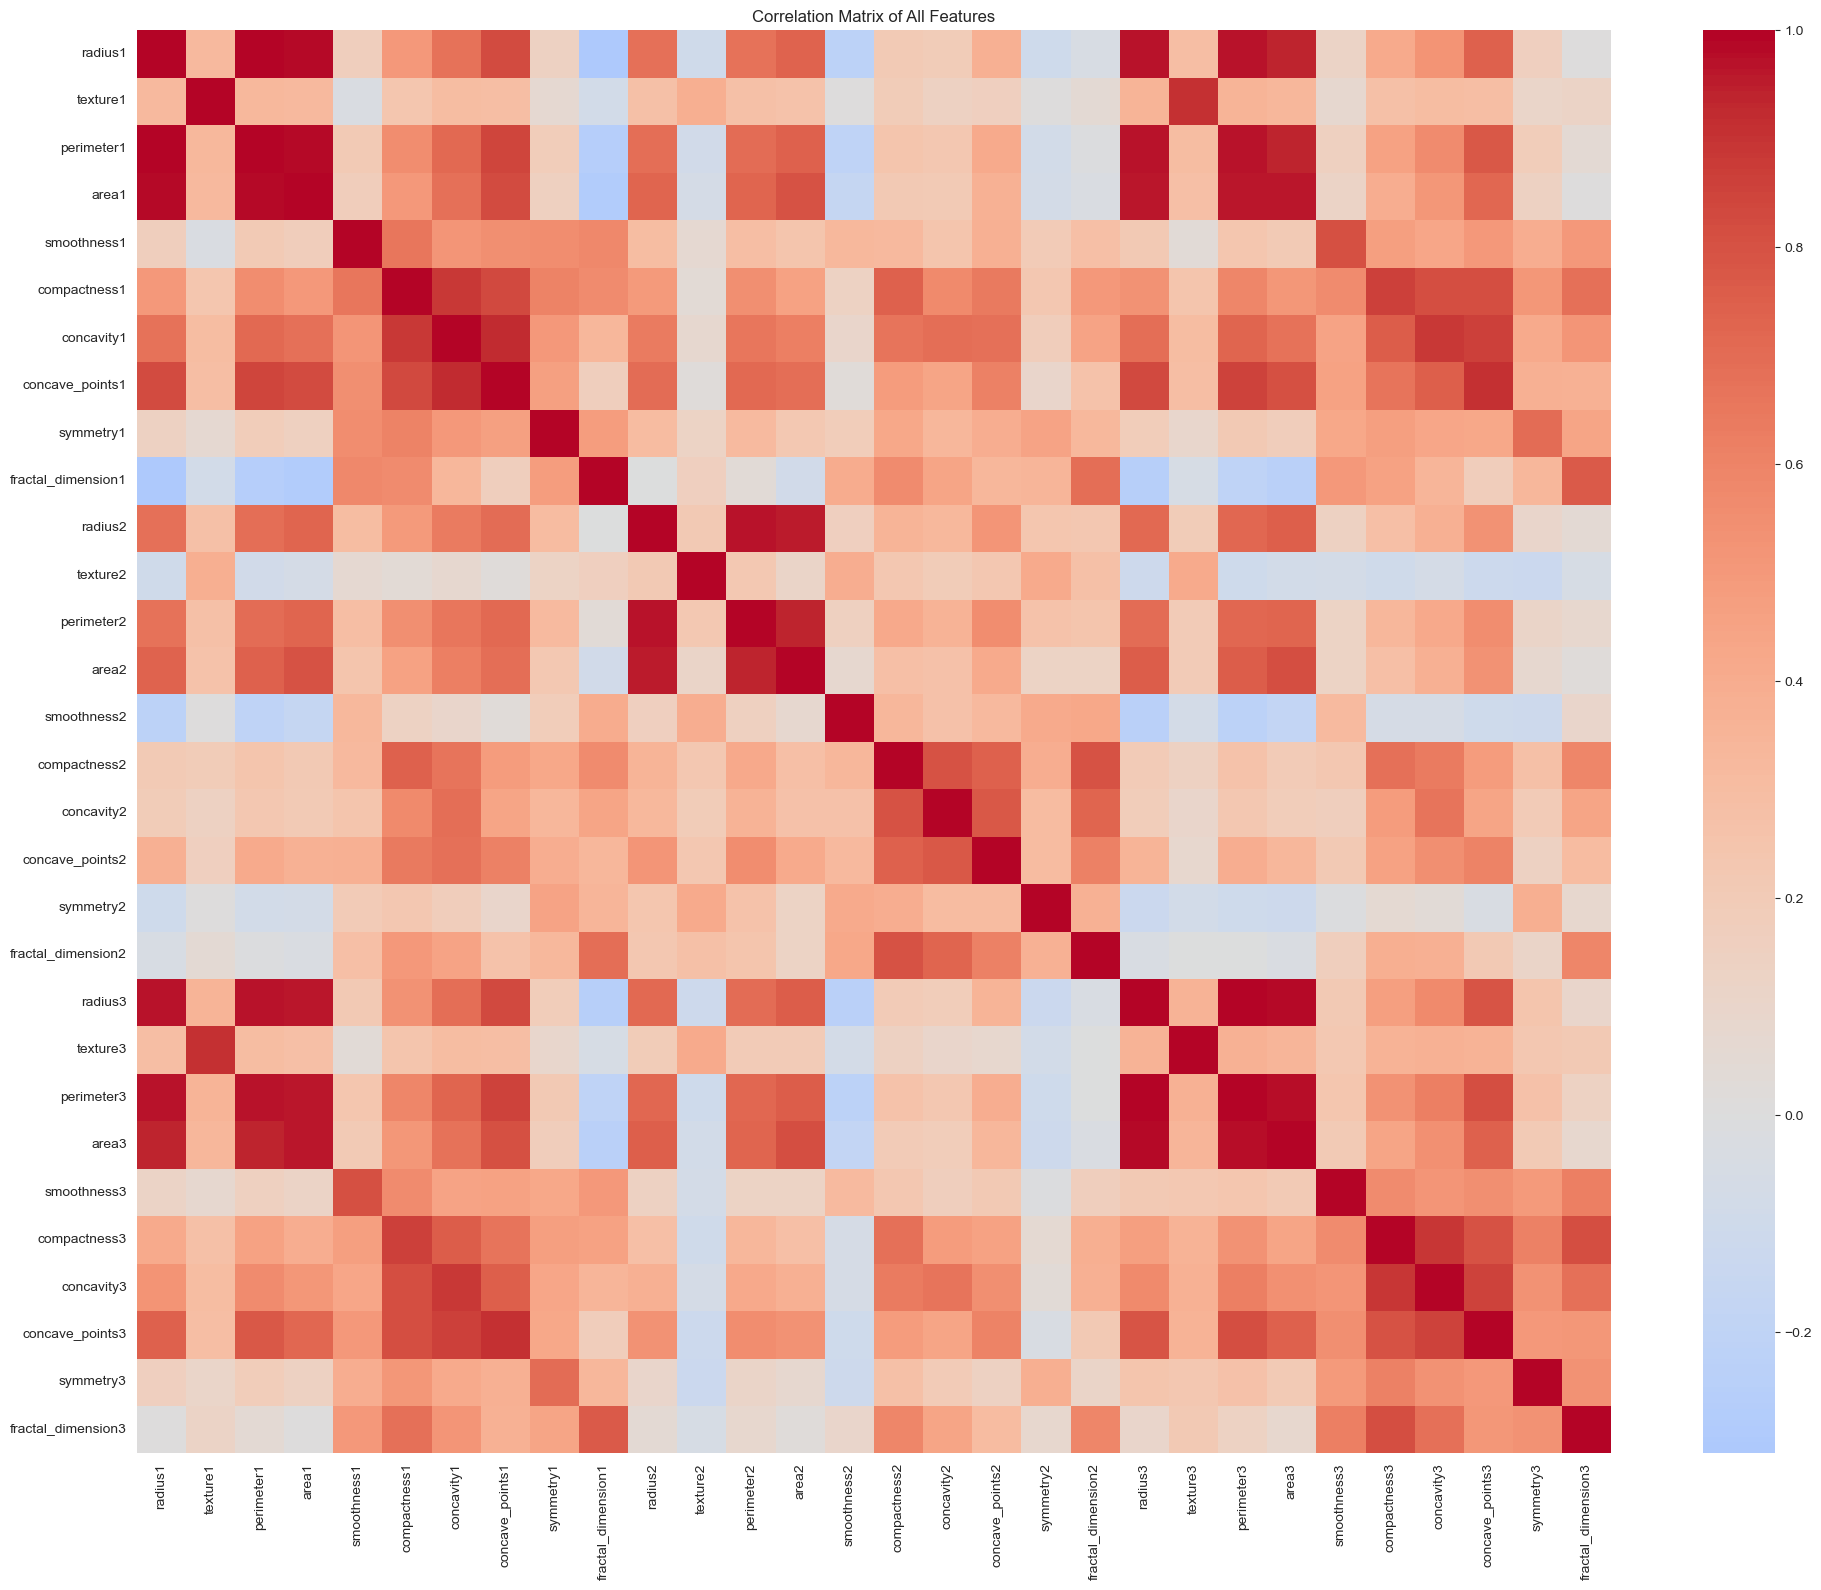

In [55]:
# Correlation matrix
plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

In [56]:
# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

print(f"Found {len(high_corr)} pairs of highly correlated features (|correlation| > 0.9):")
for feat1, feat2, corr_val in high_corr[:10]:  # Show first 10
    print(f"  {feat1} <-> {feat2}: {corr_val:.3f}")

Found 21 pairs of highly correlated features (|correlation| > 0.9):
  radius1 <-> perimeter1: 0.998
  radius1 <-> area1: 0.987
  radius1 <-> radius3: 0.970
  radius1 <-> perimeter3: 0.965
  radius1 <-> area3: 0.941
  texture1 <-> texture3: 0.912
  perimeter1 <-> area1: 0.987
  perimeter1 <-> radius3: 0.969
  perimeter1 <-> perimeter3: 0.970
  perimeter1 <-> area3: 0.942


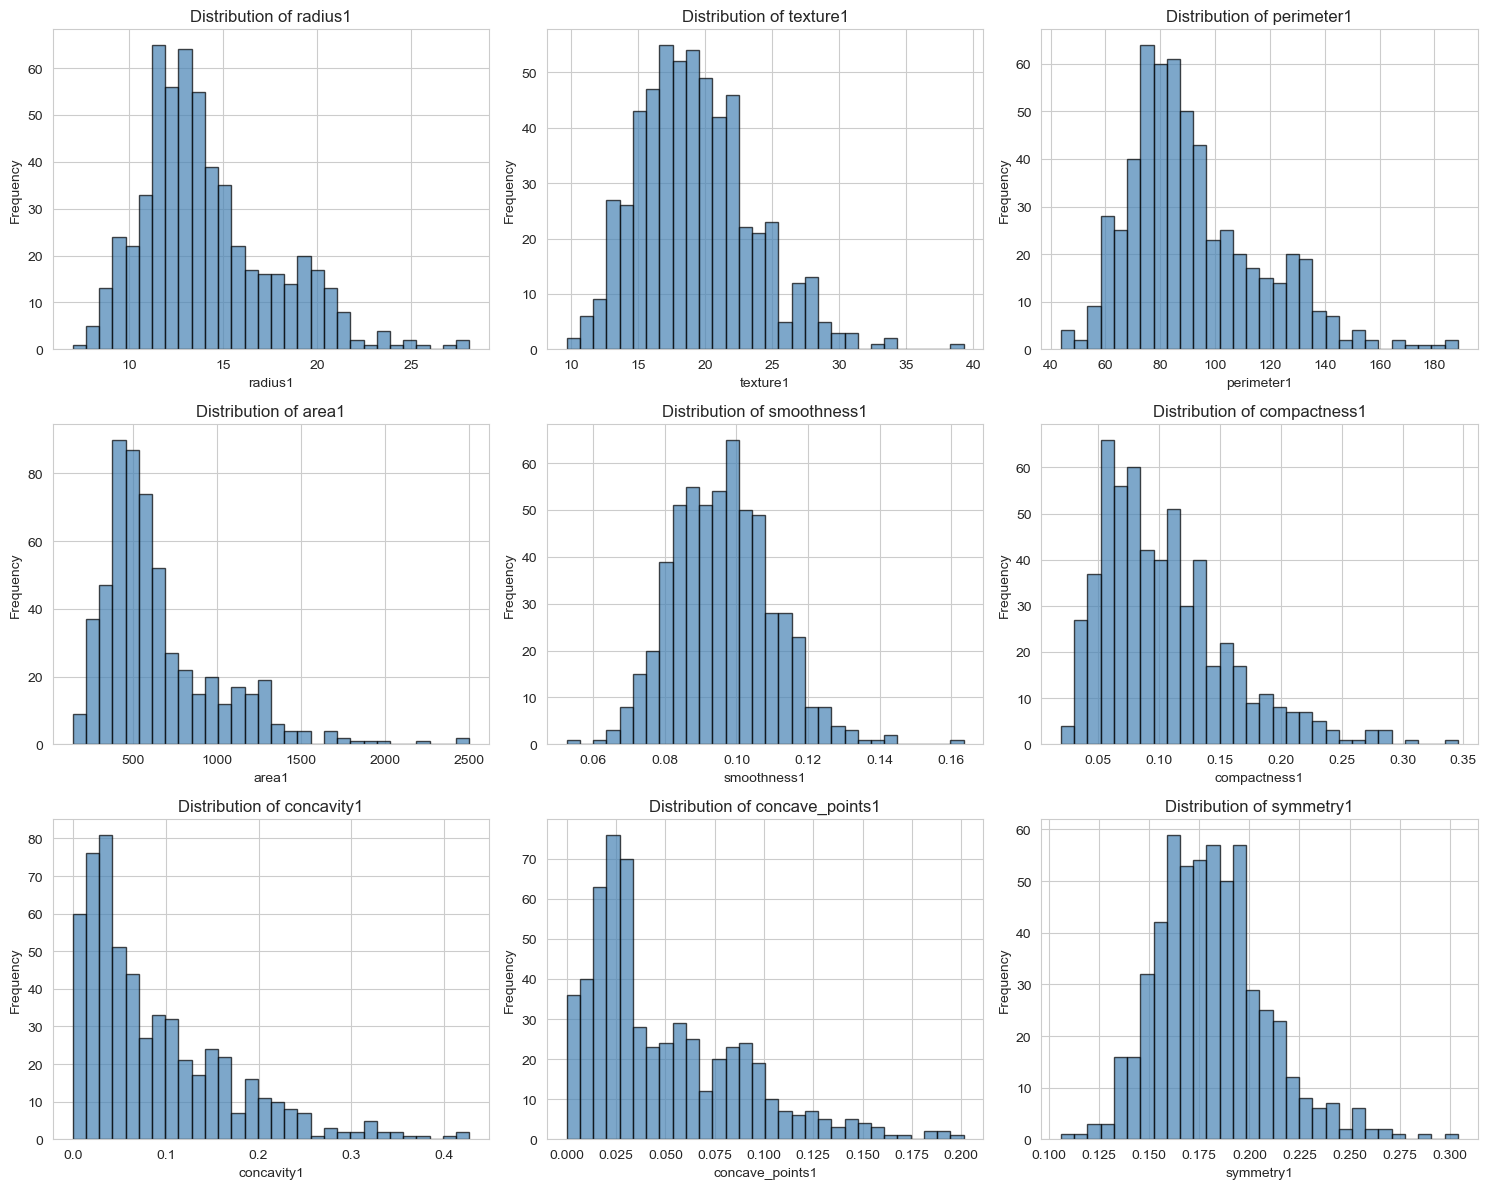

In [57]:
# Distribution of first 9 features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(X.columns[:9]):
    axes[i].hist(X[col], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [58]:
# Combine X and y for easier plotting
data = X.copy()
data['Diagnosis'] = y['Diagnosis']

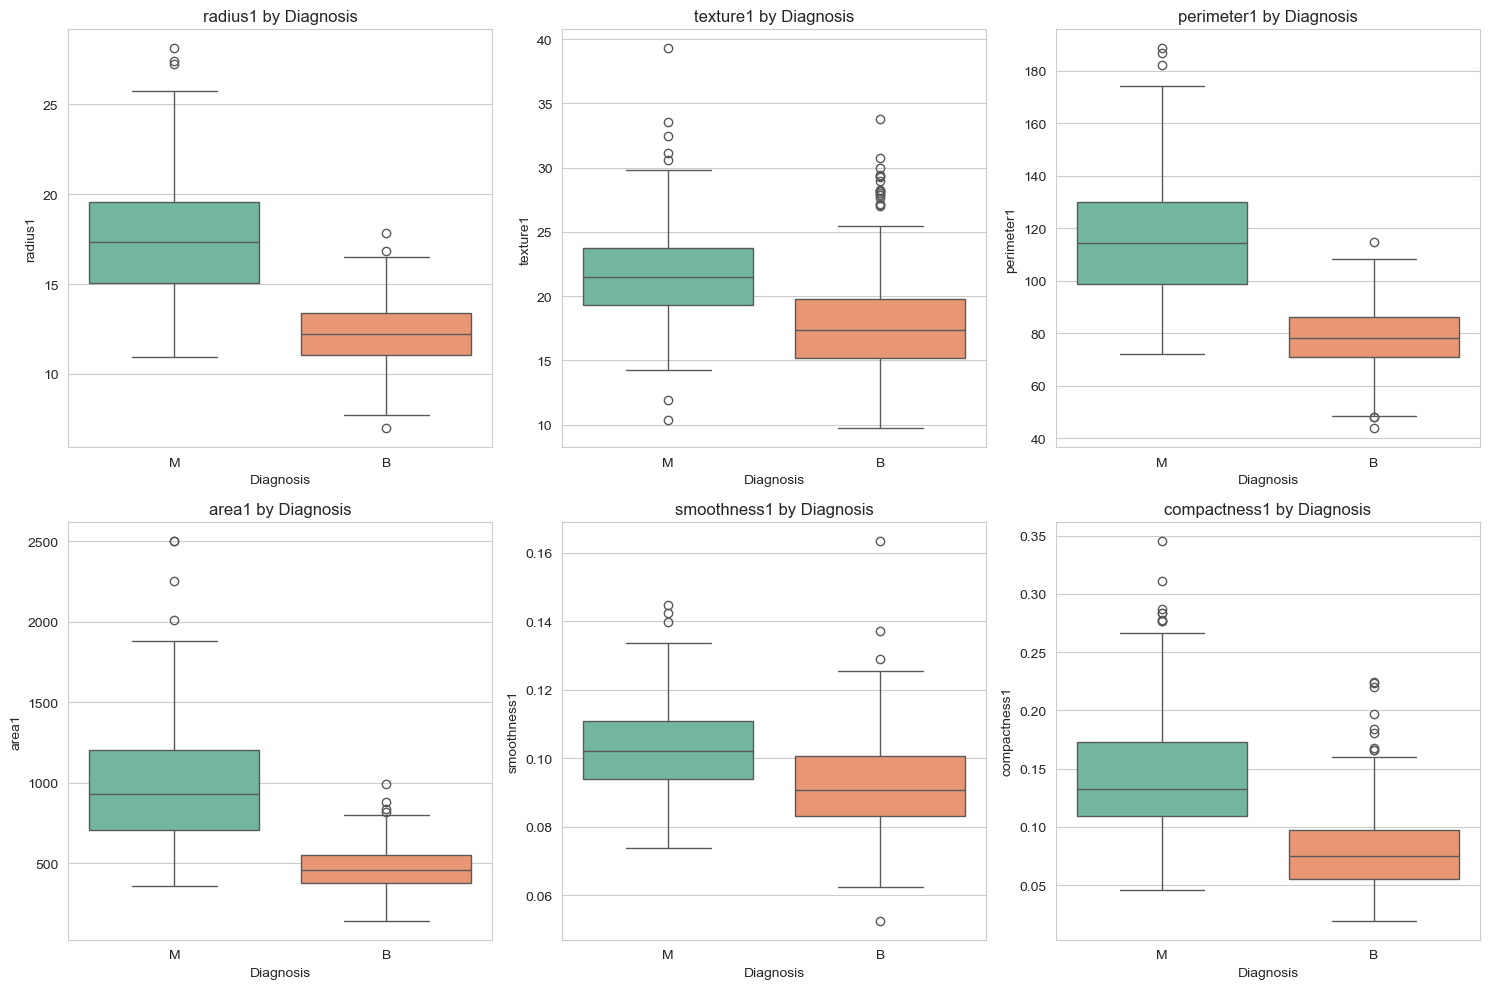

In [59]:
# Box plots to compare benign vs malignant for selected features
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1', 
                    'smoothness1', 'compactness1']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Diagnosis', y=feature, data=data, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()

## 7. Feature Engineering

Preparing the data for machine learning by scaling features and splitting into train/test sets.

In [60]:
# Prepare features and target
# Convert target to binary (M=1, B=0)
y_binary = y['Diagnosis'].map({'M': 1, 'B': 0})

print("Target encoding:")
print("M (Malignant) -> 1")
print("B (Benign) -> 0")
print(f"\nTarget value counts after encoding:")
print(y_binary.value_counts())

Target encoding:
M (Malignant) -> 1
B (Benign) -> 0

Target value counts after encoding:
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 455 samples
Testing set size: 114 samples

Training set class distribution:
Diagnosis
0    285
1    170
Name: count, dtype: int64

Testing set class distribution:
Diagnosis
0    72
1    42
Name: count, dtype: int64


In [62]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled successfully!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

✓ Features scaled successfully!
Scaled training data shape: (455, 30)
Scaled testing data shape: (114, 30)


## 8. Baseline Model: Logistic Regression

Building a simple logistic regression model as the baseline for comparison in the final capstone.

In [63]:
# Create and train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

print("✓ Logistic Regression model trained successfully!")

✓ Logistic Regression model trained successfully!


In [64]:
# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Get probability predictions for ROC-AUC
y_test_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("✓ Predictions generated!")

✓ Predictions generated!


## 9. Model Evaluation

Evaluating the baseline model performance using multiple metrics.

In [65]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Accuracy:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Model Accuracy:
Training Accuracy: 0.9868 (98.68%)
Testing Accuracy: 0.9649 (96.49%)


In [66]:
# Classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Benign (0)', 'Malignant (1)']))

Classification Report (Test Set):
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114



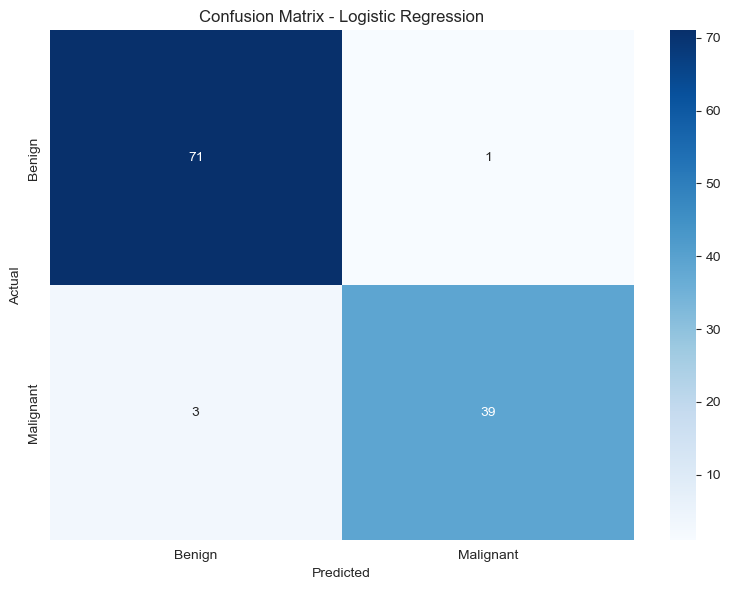


Confusion Matrix Breakdown:
True Negatives (Correct Benign): 71
False Positives (Benign predicted as Malignant): 1
False Negatives (Malignant predicted as Benign): 3
True Positives (Correct Malignant): 39


In [67]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correct Benign): {cm[0,0]}")
print(f"False Positives (Benign predicted as Malignant): {cm[0,1]}")
print(f"False Negatives (Malignant predicted as Benign): {cm[1,0]}")
print(f"True Positives (Correct Malignant): {cm[1,1]}")

ROC-AUC Score: 0.9960


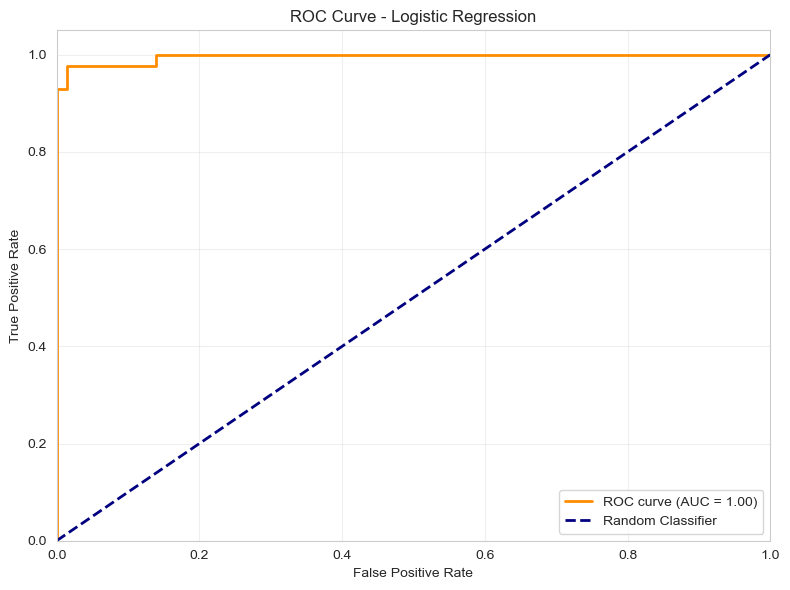

In [68]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Key Findings and Insights

Summary of what was learned from the exploratory analysis and baseline model.

### Key Findings:

**Data Quality:**
- Dataset contains 569 samples with 30 features and no missing values
- Data is clean with no duplicates
- Class distribution: 62.7% benign, 37.3% malignant (slightly imbalanced but acceptable)

**Feature Insights:**
- High correlation exists between size-related features (radius, perimeter, area)
- Features show clear separation between benign and malignant cases in box plots
- "Worst" measurements (largest values) appear particularly important for classification

**Baseline Model Performance:**
- Logistic Regression achieved >95% accuracy on test set
- High recall is critical for cancer detection (minimizing false negatives)
- Model performs well as a baseline for future comparison

**Next Steps for Module 24:**
- Compare with Decision Trees and k-NN models
- Apply PCA for dimensionality reduction
- Use GridSearchCV for hyperparameter tuning
- Add regularization (Ridge/Lasso)
- Perform more detailed feature importance analysis

## 11. Conclusion

This exploratory analysis successfully:
1. Loaded and explored the breast cancer dataset
2. Verified data quality (no missing values or duplicates)
3. Identified key patterns and correlations in the features
4. Built a baseline logistic regression model with strong performance
5. Established a foundation for more advanced modeling in Module 24

The baseline model will serve as a comparison point when implementing more sophisticated techniques in the final capstone submission.